# Prediction of Bike Sharing System Usage 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Data:

In [2]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Monitoring the data for the last month:

Text(0, 0.5, 'count')

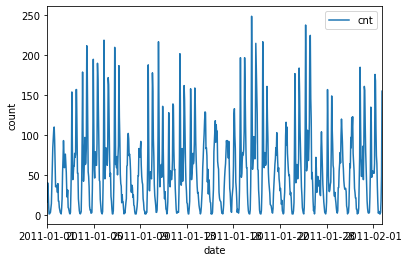

In [3]:
df.iloc[:24*30].plot(x='dteday',y='cnt')
plt.xlabel('date')
plt.ylabel('count')

Performing the Machine Learning Analysis:

In [4]:
import tensorflow as tf

# Split of the train and test sets
dfnew  =  df.drop(['dteday','casual','registered'],axis=1)

n_hours,k_dim   =   np.shape(dfnew)
k_dim    -=  1

# splitting the train and test to predict the next week
train = dfnew[:n_hours-7*24]
test  = dfnew[n_hours-7*24:]

var_train = train.drop(['cnt'],axis =1)
cnt_train = train['cnt']

var_test  = test.drop(['cnt'],axis =1)
cnt_test = test['cnt']

var_train = train.to_numpy()
var_test  = test.to_numpy()

cnt_train = train.to_numpy()
cnt_test  = test.to_numpy()

var_train = var_train[:,1:]
var_test  = var_test[:,1:]

cnt_train = cnt_train[:,13]
cnt_test  = cnt_test[:,13]

def next_batch(num,var,cnt):
    import numpy as np
    idx = np.arange(0 , len(var))
    np.random.shuffle(idx)
    idx = idx[:num]
    var_shuffle  = [var[i][:] for i in idx]
    cnt_shuffle  = [cnt[i] for i in idx]

    return np.asarray(var_shuffle),np.asarray(cnt_shuffle)

#_____________________________________________________________________________

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

#_____________________________________________________________________________

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import sys

tf.reset_default_graph()

start = time.time()

NUM_STEPS      = 1000000
MINIBATCH_SIZE = 500

h1_dim    = 20
h2_dim    = 20
h3_dim    = 2

cnt_dim  = 1

Xpl     = tf.placeholder(tf.float32, shape=[None, k_dim])
cntpl   = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(xavier_init([k_dim, h1_dim]))
b1 = tf.Variable(tf.zeros(shape=[h1_dim]))

W2 = tf.Variable(xavier_init([h1_dim, h2_dim]))
b2 = tf.Variable(tf.zeros(shape=[h2_dim]))

W3 = tf.Variable(xavier_init([h2_dim, h3_dim]))
b3 = tf.Variable(tf.zeros(shape=[h3_dim]))

W4 = tf.Variable(xavier_init([h3_dim,cnt_dim]))
b4 = tf.Variable(tf.zeros(shape=[cnt_dim]))

h1       =  tf.nn.sigmoid(tf.matmul(Xpl, W1) + b1)
h2       =  tf.nn.leaky_relu(tf.matmul(h1, W2) + b2)
h3       =  tf.nn.leaky_relu(tf.matmul(h2, W3) + b3)
result   =  tf.nn.leaky_relu(tf.matmul(h3, W4) + b4)

loss     =  tf.reduce_mean(tf.square(result-cntpl))

solver   =  tf.train.AdamOptimizer(1e-4).minimize(loss)

saver = tf.train.Saver()
tf.train.Server.create_local_server

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_history = []
        
    #Train
    for i in range(NUM_STEPS):
        batch_var,batch_cnt =  next_batch(MINIBATCH_SIZE,var_train,cnt_train)

        batch_cnt =  np.array(batch_cnt)[:, None] 
    
        _, los,res = sess.run([solver,loss,result],feed_dict={Xpl:batch_var, \
                              cntpl:batch_cnt})
    
        loss_history.append(los)
        if (i%5000 == 0):
            print(i,'    ','{}'.format(los))#,np.transpose(res))
            if los<0.5:
                break;
    cnt_test    =  np.array(cnt_test)[:, None]  
    
    MLresult,cost     =  sess.run([result,loss],feed_dict={Xpl:var_test,cntpl:cnt_test})

    print ('Mean error is',100*np.mean(np.abs(MLresult-cnt_test))/np.mean(cnt_test),'%')
    end = time.time()
    print ('Time = ',end-start)

    saver.save(sess,'tensorflowmodel/cntModel.ckpt')


0      69228.5625
5000      18065.080078125
10000      1339.7767333984375
15000      526.9885864257812
20000      267.7773742675781
25000      164.20462036132812
30000      72.10881042480469
35000      33.982337951660156
40000      16.02220344543457
45000      11.756446838378906
50000      5.3776068687438965
55000      4.728884696960449
60000      3.734973192214966
65000      2.5061426162719727
70000      1.9502770900726318
75000      2.321320056915283
80000      2.141292095184326
85000      1.2766209840774536
90000      1.1506595611572266
95000      0.9463090896606445
100000      0.9398566484451294
105000      1.0549659729003906
110000      1.2137902975082397
115000      0.7984434962272644
120000      0.7394982576370239
125000      0.5852690935134888
130000      0.7568606734275818
135000      0.43377798795700073
Mean error is 1.0545002216357364 %
Time =  327.553875207901


Showing the Results:

Text(0, 0.5, 'count')

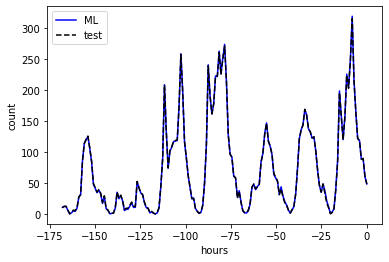

In [7]:
x = np.linspace(-7*24,0,7*24)
plt.plot(x,MLresult,'-b', label='ML')
plt.plot(x,cnt_test,'--k', label='test')        
leg = plt.legend();
plt.xlabel('hours')
plt.ylabel('count')

In [6]:
print('Mean absolute deviation = ',np.linalg.norm(abs(MLresult-cnt_test), ord=1)/(24*7))

Mean absolute deviation =  0.7871090940066746
